# Tutorial: show the layout of the focal plane

This notebook show how to illustrate the layout of the detectors on the focal plane.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl
from warpfield.telescope import retrieve_gaia_sources, Optics, Detector, Telescope

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude, Angle
from astropy.time import Time
import astropy.units as u

Point the telescope toward the Galactic center. The position angle of the telescope is set 0.0 deg in the galactic coordinate.

In [3]:
pointing = SkyCoord.from_name('Galactic Center').galactic
position_angle = Angle(0.0, unit='degree')
src = retrieve_gaia_sources(pointing, 0.25*u.deg)

INFO: Query finished. [astroquery.utils.tap.core]


The following sample defines the telescope with a single detector with the dimension of 4096&times;4096. The physical pixel size is set 10 &mu;m. The focal lentgh is set 3.86 meters. The telescope settings are passed to the `optics` parameter. The detector is passed as a list to the `detectors`.

In [4]:
optics = Optics(pointing, position_angle, focal_length=3.86*u.m)
det4k = Detector(4096,4096,10*u.um)
telescope = Telescope(optics=optics, detectors=[det4k,])

Use `display_focal_plane` function to display the detector layout.

/home/rohsawa/.pyenv/versions/3.9.9/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


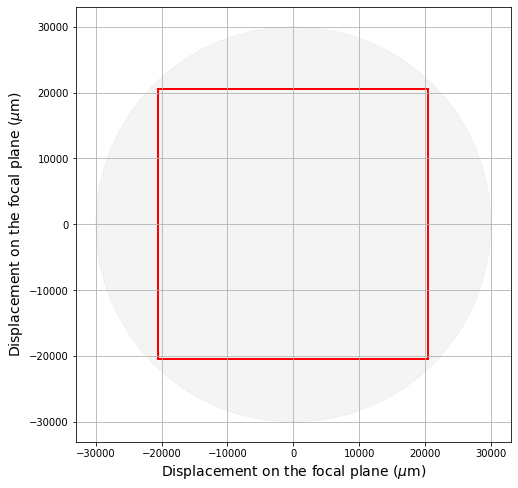

In [5]:
telescope.display_focal_plane()

When the source list is provided, the detectors are overlaid on the sources.

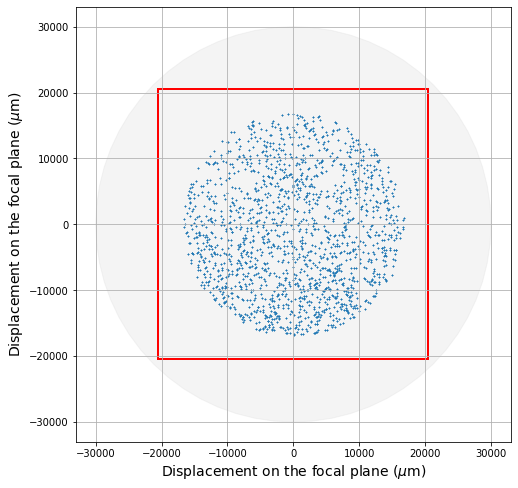

In [6]:
telescope.display_focal_plane(src)

Here, we define another detector layout. A new telescope has 9 detectors. Each detector has the dimension of 1920&times;1920 with the pixel scale of 10 &mu;m. The detectors are tiled over the focal plane, where the centers of the adjacent detectors are separated by 18 mm. Create a list of the detectors. The `Telescope` constructor receives the list as `detectors`.

In [7]:
optics = Optics(pointing, position_angle, focal_length=4.86*u.m)
arr = np.array([-1,1])*(1920*5*u.um+1.5*u.mm)
xx,yy = np.meshgrid(arr,arr)
naxis1,naxis2 = 1920,1920
pxscale = 10.0*u.um
det = [Detector(naxis1,naxis2,pxscale,offset_dx=x,offset_dy=y) for x,y in zip(xx.flat,yy.flat)]
jasmine = Telescope(optics=optics,detectors=det)

The following command is available as a shotcut of the above lines.

In [8]:
from warpfield.telescope.jasmine import get_jasmine
jasmine = get_jasmine(pointing, position_angle)

The layout is shown by the `display_focal_plane` function.

/home/rohsawa/.pyenv/versions/3.9.9/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


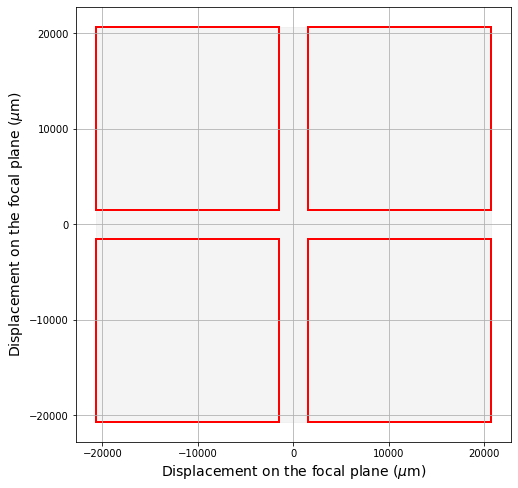

In [9]:
jasmine.display_focal_plane()

The positions of the sources are displayed as well when the source list is provided.

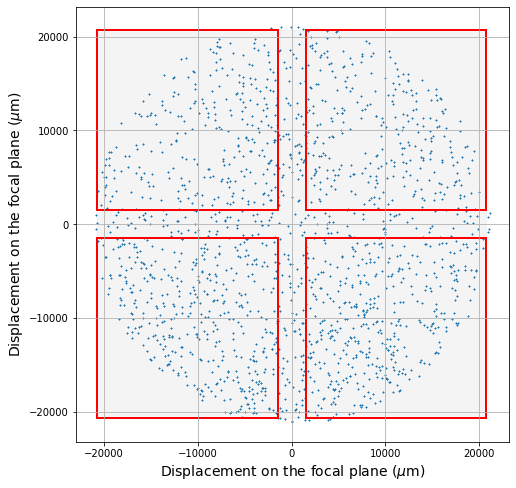

In [10]:
jasmine.display_focal_plane(src)